In [4]:
# Fetch Twitter data and Classify as Positive or Neagtive Sentiment with Classification Percentage

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import time
import sentiment_mod as s


#consumer key, consumer secret, access token, access secret.
consumer_key ="Consumer_Key"
consumer_secret="Consumer_Secret"
access_token="Access_Token"
access_token_secret="Access_Token_Secret"

class listen_data(StreamListener):
    def on_data(self, data):
        all_data = json.loads(data)
        try:
            tweet = all_data['text']
            sentiment, confidence = s.sentiment(tweet.lower())
            print(tweet, sentiment, confidence)
            if confidence*100 >= 75:
                output_file = open('Tweet_sentiments.txt','a')
                output_file.write(sentiment)
                output_file.write('\n')
                output_file.close()
            return True
        except:
            return True
    def on_error(self, status):
        print(status)

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

twitter_data_stream = Stream(auth,listen_data())
twitter_data_stream.filter(track=['obama'])                 # Add any topic: track = ['topic_name']


RT @AnonScan: Mark Levin PROVES Obama Wiretapping on President Donald Trump 🏛😲 Fox&amp;Friends 3/5/17 via @ARnews1936 via @RebelMouse https://t… neg 1.0
RT @JJohnsonLaw: Imagine, if you will, Barack Obama owned a nightclub in Chicago, while POTUS. And Loretta Lynch was the doorwoman.…  neg 1.0
#draintheswamp https://t.co/00gXeFBnA3 neg 1.0
RT @dukebob888: Who pulls whose Strings https://t.co/Rt8tDgpNI2 neg 1.0
RT @PolitiFact: White House spox @SarahHuckabee: “Multiple news outlets” have reported that Obama ordered wiretaps on Trump. False.…  neg 1.0
Israel threatens to give Trump 'evidence' that Obama orchestrated UN resolution https://t.co/m7R0VZuWpY pos 1.0
RT @MariaTCardona: Sigh... https://t.co/EPNrw9zYlA neg 1.0
RT @Italians4Trump: Dear Comey,

Either you recuse yourself or resign! 

Pick which one, because we see the color of your jersey shirt…  neg 1.0
RT @JJohnsonLaw: Imagine, if you will, Barack Obama owned a nightclub in Chicago, while POTUS. And Loretta Lynch was the doorwom

ProtocolError: ('Connection broken: IncompleteRead(1043 bytes read)', IncompleteRead(1043 bytes read))

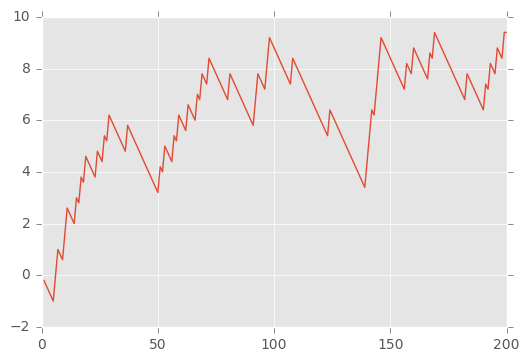

In [5]:
# Plot the graph for the Sentiment Values in Real Time

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    tweetData = open('Tweet_sentiments.txt','r').read()
    lines = tweetData.split('\n')
    xarr = []
    yarr = []
    x = 0
    y = 0
    for l in lines[-200:]:
        x += 1
        if 'pos' in l:
            y += 1
        elif 'neg' in l:
            y -= 0.2

        xarr.append(x)
        yarr.append(y)
    ax1.clear()
    ax1.plot(xarr, yarr)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()
